# Redes Neurais Convolucionais


Nesta competição, você escreverá um algoritmo para classificar se as imagens contêm um cachorro ou um gato. Isso é fácil para humanos, cães e gatos. Seu computador terá um pouco mais de dificuldade. 

<img src='woof_meow.jpg' />


### Problema: Dada uma imagem, é um cachorro ou um gato?

Para essa tarefa, usaremos uma arquitetura de Rede Neural Convolucional. Essa arquitetura usa métodos de convolução para poder prever características específicas de uma imagem de acordo com o que aprende em um conjunto de treinamento. Por exemplo, podemos dizer que é possível perceber a diferença ao procurar bigodes em um gato ou focinho comprido em um cachorro. Mas uma Rede Neural Convolucional procura muitos outros recursos baseados no que temos em um conjunto de treinamento.

##### Conjunto de dados de treino:  2.000 imagens de cães e 2.000 imagens de gatos.

##### Conjunto de dados de validação: 500 imagens de cães e 500 imagens de gatos.

Conjunto de dados de teste: Teremos x imagens de cães e gatos.

Essa á uma questão onde os iniciantes tem muitas dúvidas. Por que precisamos de dados de treino, validação e teste? Usamos os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usamos os dados de validação, para avaliar o modelo durante o treinamento. Usamos os dados de teste para validar a performance do modelo já treinado, ou seja, apresentamos ao modelo dados que ele não viu durante o treinamento, a fim de garantir que ele é capaz de fazer previsões.

# **Vamos começar!**



## Importando as bibliotecas

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

### Arquitetura da Rede Convolucional


<img src='arquitetura.png'/>

In [143]:
WIDTH = 220
LENGHT = 220
BATCH = 20
EPOCHS = 15

In [144]:
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                padding='same', input_shape=(WIDTH, LENGHT, 3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((4, 4)))
classificador.add(Dropout(0.2))  

classificador.add(Conv2D(64, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((3, 3)))
classificador.add(Dropout(0.25))

classificador.add(Conv2D(128, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((2, 2)))
classificador.add(Dropout(0.25))

classificador.add(Flatten())
classificador.add(Dense(512, activation='relu'))
classificador.add(BatchNormalization())
classificador.add(Dropout(0.5))
classificador.add(Dense(1, activation='sigmoid')) 

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Normalizar as imagens

In [145]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [146]:
base_treinamento = gerador_treinamento.flow_from_directory('dataset/training_set',
                                                           target_size = (WIDTH, LENGHT),
                                                           batch_size = BATCH,
                                                           class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [147]:
base_teste = gerador_teste.flow_from_directory('dataset/test_set',
                                               target_size = (WIDTH, LENGHT),
                                               batch_size = BATCH,
                                               class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [148]:
classificador.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 220, 220, 32)      896       
_________________________________________________________________
batch_normalization_56 (Batc (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 53, 53, 64)        18496     
_________________________________________________________________
batch_normalization_57 (Batc (None, 53, 53, 64)        256       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 64)      

## Treinamento

In [167]:
history = classificador.fit(base_treinamento, steps_per_epoch = 4000 // BATCH,
                            epochs = EPOCHS, validation_data = base_teste,
                            validation_steps = 1000 // BATCH)

Epoch 1/15
200/200 [==============================] - 128s 642ms/step - loss: 0.4585 - accuracy: 0.7897 - val_loss: 0.4946 - val_accuracy: 0.7710
Epoch 2/15
200/200 [==============================] - 131s 652ms/step - loss: 0.4476 - accuracy: 0.7830 - val_loss: 1.1182 - val_accuracy: 0.6300
Epoch 3/15
200/200 [==============================] - 129s 645ms/step - loss: 0.4441 - accuracy: 0.7945 - val_loss: 0.5008 - val_accuracy: 0.7830
Epoch 4/15
200/200 [==============================] - 131s 654ms/step - loss: 0.4364 - accuracy: 0.7977 - val_loss: 0.4296 - val_accuracy: 0.7990
Epoch 5/15
200/200 [==============================] - 132s 658ms/step - loss: 0.4083 - accuracy: 0.8115 - val_loss: 0.5670 - val_accuracy: 0.7530
Epoch 6/15
200/200 [==============================] - 132s 657ms/step - loss: 0.4085 - accuracy: 0.8080 - val_loss: 0.5181 - val_accuracy: 0.7600
Epoch 7/15
200/200 [==============================] - 133s 663ms/step - loss: 0.4060 - accuracy: 0.8070 - val_loss: 0.4596 -

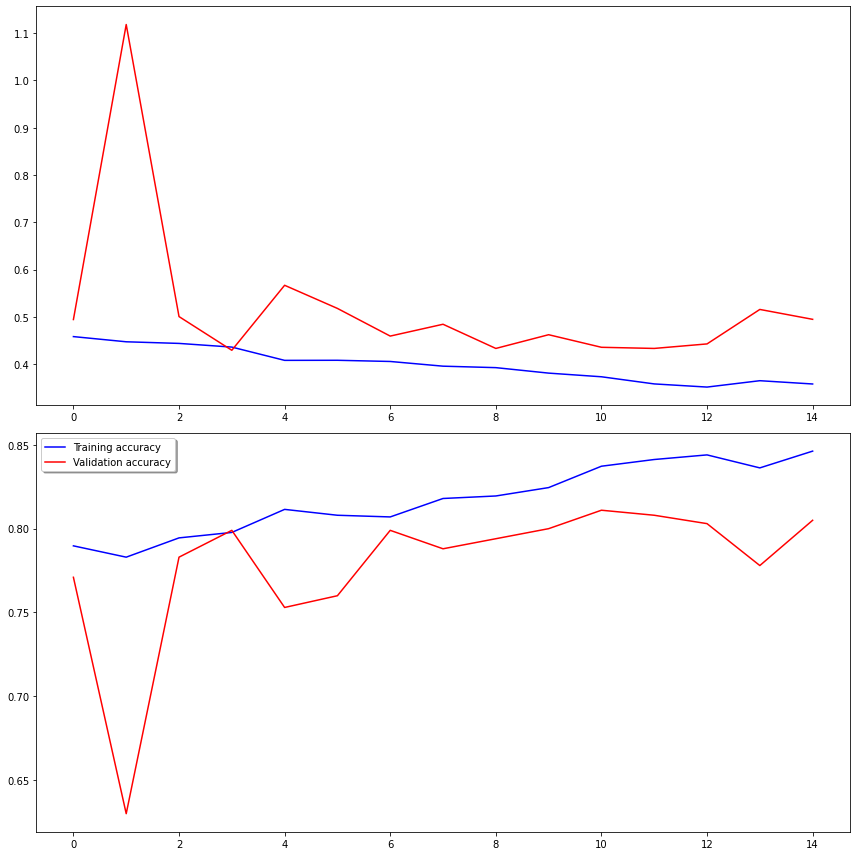

In [170]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Teste *

0.7758080363273621 -> Gato


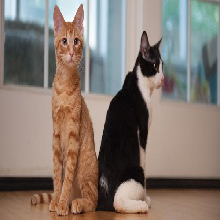

In [176]:
imagem_teste1 = image.load_img('teste-dataset/gato-1.jpg',
                              target_size = (WIDTH,LENGHT))
imagem_teste = image.img_to_array(imagem_teste1)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)
previsao = classificador.predict(imagem_teste)

def classe(c):
    if c > 0.5:
        return 'Gato'
    return 'Cachorro'

print(f'{previsao[0,0]} -> {classe(previsao)}')
imagem_teste1

# Teste final



In [177]:
  gerador_teste_final = ImageDataGenerator(rescale = 1./300)

In [198]:
teste_final_base = gerador_teste_final.flow_from_directory('animals/',
                                                           target_size = (WIDTH, LENGHT),
                                                           batch_size = 1,
                                                           class_mode = 'binary')

filenames = teste_final_base.filenames
nb_samples = len(filenames)

Found 40 images belonging to 2 classes.


In [199]:
classificador.predict(teste_final_base, steps=nb_samples)

array([[9.9992210e-01],
       [9.9884892e-01],
       [3.9623141e-02],
       [9.3510664e-01],
       [9.0711910e-01],
       [3.0682412e-01],
       [9.9867654e-01],
       [2.2774637e-03],
       [6.5921003e-01],
       [9.9931371e-01],
       [4.1717827e-01],
       [9.9994677e-01],
       [4.7801822e-02],
       [9.9758482e-01],
       [9.9999690e-01],
       [9.9995798e-01],
       [9.9996972e-01],
       [2.9798448e-03],
       [8.8448071e-01],
       [9.9633795e-01],
       [9.7366893e-01],
       [1.6784340e-02],
       [5.5918543e-05],
       [5.7313854e-01],
       [9.9920845e-01],
       [8.9435637e-02],
       [3.1130165e-02],
       [5.5147284e-01],
       [2.7861691e-01],
       [9.3765330e-01],
       [9.9982935e-01],
       [7.2770596e-02],
       [1.5143919e-01],
       [9.9315608e-01],
       [2.1137995e-01],
       [5.5059826e-01],
       [5.6869358e-01],
       [6.7202771e-01],
       [2.6008433e-01],
       [5.1788700e-01]], dtype=float32)